<a href="https://colab.research.google.com/github/kovanika/kovanika.github.io/blob/main/%D0%9A%D1%83%D1%80%D1%81%D0%BE%D0%B2%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score,mean_squared_error
import statsmodels.api as sm
from sklearn.model_selection import learning_curve
from sklearn.feature_selection import RFE
matplotlib.style.use('ggplot')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/Cellphone.csv', sep=',', index_col='Product_id')
df

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Product_id,,,,,,,,,,,,,
203,2357,10,135.0,5.20,424,8,1.350,16.0,3.000,13.00,8.0,2610,7.4
880,1749,10,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
40,1916,10,110.0,4.70,312,4,1.200,8.0,1.500,13.00,5.0,2000,7.6
99,1315,11,118.5,4.00,233,2,1.300,4.0,0.512,3.15,0.0,1400,11.0
880,1749,11,125.0,4.00,233,2,1.300,4.0,1.000,3.15,0.0,1700,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1206,3551,4638,178.0,5.46,538,4,1.875,128.0,6.000,12.00,16.0,4080,8.4
1296,3211,8016,170.0,5.50,534,4,1.975,128.0,6.000,20.00,8.0,3400,7.9
856,3260,8809,150.0,5.50,401,8,2.200,64.0,4.000,20.00,20.0,3000,6.8


In [ ]:
df.describe()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000
mean,2215.596273,621.465839,170.426087,5.209938,335.055901,4.857143,1.502832,24.501714,2.204994,10.378261,4.503106,2842.111801,8.921739
std,768.187171,1546.618517,92.888612,1.509953,134.826659,2.444016,0.599783,28.804773,1.609831,6.181585,4.342053,1366.990838,2.192564
min,614.000000,10.000000,66.000000,1.400000,121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,800.000000,5.100000
25%,1734.000000,37.000000,134.100000,4.800000,233.000000,4.000000,1.200000,8.000000,1.000000,5.000000,0.000000,2040.000000,7.600000
50%,2258.000000,106.000000,153.000000,5.150000,294.000000,4.000000,1.400000,16.000000,2.000000,12.000000,5.000000,2800.000000,8.400000
75%,2744.000000,382.000000,170.000000,5.500000,428.000000,8.000000,1.875000,32.000000,3.000000,16.000000,8.000000,3240.000000,9.800000
max,4361.000000,9807.000000,753.000000,12.200000,806.000000,8.000000,2.700000,128.000000,6.000000,23.000000,20.000000,9500.000000,18.500000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

d = preprocessing.normalize(df, axis=0)

df_norm = pd.DataFrame(d, columns=df.columns)
df_norm.head()


,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
0,0.079241,0.000474,0.054855,0.075570,0.092562,0.116027,0.065781,0.033405,0.086695,0.084884,0.100940,0.065261,0.063491
1,0.058800,0.000474,0.050791,0.058131,0.050866,0.029007,0.063345,0.008351,0.028898,0.020568,0.000000,0.042507,0.084941
2,0.064415,0.000474,0.044696,0.068303,0.068112,0.058014,0.058472,0.016703,0.043348,0.084884,0.063088,0.050008,0.065207
3,0.044210,0.000522,0.048150,0.058131,0.050866,0.029007,0.063345,0.008351,0.014796,0.020568,0.000000,0.035006,0.094379
4,0.058800,0.000522,0.050791,0.058131,0.050866,0.029007,0.063345,0.008351,0.028898,0.020568,0.000000,0.042507,0.084941


In [ ]:
df_norm.corr()

,Price,Sale,weight,resoloution,ppi,cpu core,cpu freq,internal mem,ram,RearCam,Front_Cam,battery,thickness
Price,1.000000,0.273263,0.144555,0.404010,0.817614,0.686811,0.727383,0.776738,0.896915,0.739538,0.675286,0.559946,-0.716773
Sale,0.273263,1.000000,0.016114,0.017154,0.235896,0.069517,0.099133,0.489308,0.373127,0.292164,0.437233,0.120338,-0.047991
weight,0.144555,0.016114,1.000000,0.890416,-0.054683,0.216257,0.222730,0.098849,0.149283,-0.029448,-0.005971,0.833783,-0.185262
resoloution,0.404010,0.017154,0.890416,1.000000,0.181292,0.472226,0.505454,0.202660,0.327216,0.249892,0.202720,0.843462,-0.533708
ppi,0.817614,0.235896,-0.054683,0.181292,1.000000,0.487990,0.713168,0.618560,0.748724,0.774008,0.491371,0.302517,-0.496791
cpu core,0.686811,0.069517,0.216257,0.472226,0.487990,1.000000,0.491519,0.276251,0.483128,0.611353,0.586698,0.459728,-0.697935
cpu freq,0.727383,0.099133,0.222730,0.505454,0.713168,0.491519,1.000000,0.441400,0.633547,0.625104,0.358319,0.473137,-0.614458
internal mem,0.776738,0.489308,0.098849,0.202660,0.618560,0.276251,0.441400,1.000000,0.875354,0.451917,0.555733,0.461506,-0.367412
ram,0.896915,0.373127,0.149283,0.327216,0.748724,0.483128,0.633547,0.875354,1.000000,0.648073,0.647470,0.541001,-0.521074
RearCam,0.739538,0.292164,-0.029448,0.249892,0.774008,0.611353,0.625104,0.451917,0.648073,1.000000,0.596374,0.287821,-0.550998


In [ ]:
X = df_norm[['Sale',	'weight',	'resoloution',	'ppi',	'cpu core',	'cpu freq',	'internal mem',	'ram',	'RearCam',	'Front_Cam',	'battery']]
y = df_norm['Price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
model = LinearRegression()
model_1 = model.fit(X_train,y_train)

In [ ]:
coef = pd.DataFrame(zip(['intercept'] + X.columns.tolist(), [model.intercept_] + model.coef_.tolist()),
                    columns=['predictor', 'coef'])
coef

,predictor,coef
0,intercept,0.018247
1,Sale,-0.017461
2,weight,-0.196800
3,resoloution,0.161668
4,ppi,0.194512
5,cpu core,0.158600
6,cpu freq,0.096963
7,internal mem,0.098807
8,ram,0.124634
9,RearCam,-0.002405


In [ ]:
print(f'Получившиеся уравнение: y = {model_1.intercept_} + {model_1.coef_} * x_i')

Получившиеся уравнение: y = 0.018246693613981367 + [-0.01746115 -0.19679954  0.16166794  0.19451217  0.15860027  0.09696347
  0.09880664  0.12463397 -0.00240496  0.02192772  0.16091853] * x_i


In [ ]:
print ("R^2: {}".format(model.score(X, y)))

R^2: 0.9418998958868711


In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

Обучающая

In [ ]:
train_rmse

0.006448670393457736

Тестовая

In [ ]:
test_rmse

0.005611104946377544

Коэффициент детерминации

In [ ]:
r2_score(y_test,y_test_pred)

0.9434306336145302

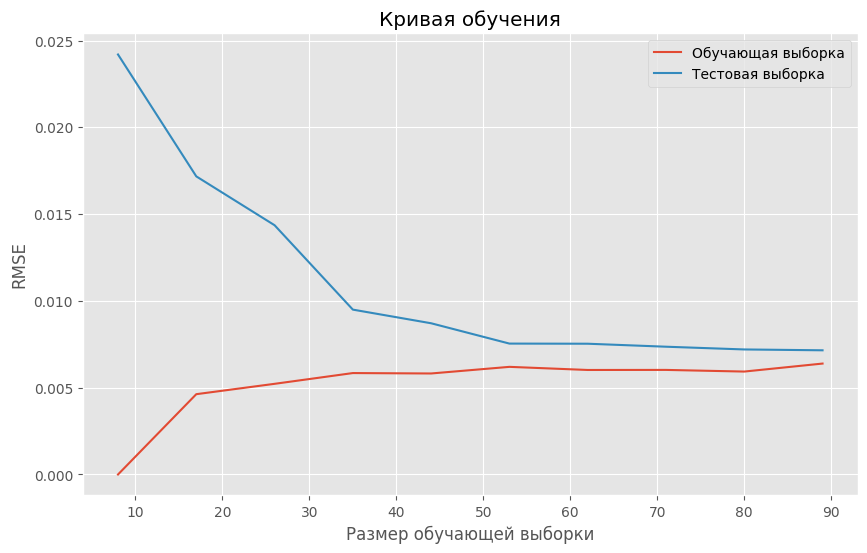

In [ ]:
def plot_learning_curve(model, X, y):
    train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', train_sizes=np.linspace(0.1, 1.0, 10))

    train_rmse_mean = np.sqrt(-train_scores.mean(axis=1))
    test_rmse_mean = np.sqrt(-test_scores.mean(axis=1))

    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_rmse_mean, label='Обучающая выборка')
    plt.plot(train_sizes, test_rmse_mean, label='Тестовая выборка')

    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('RMSE')
    plt.title('Кривая обучения')
    plt.legend()
    plt.show()

# Используем вашу модель и данные
model = LinearRegression()
model.fit(X_train, y_train)

# Построим кривую обучения
plot_learning_curve(model, X, y)

Полиномиальная регрессия

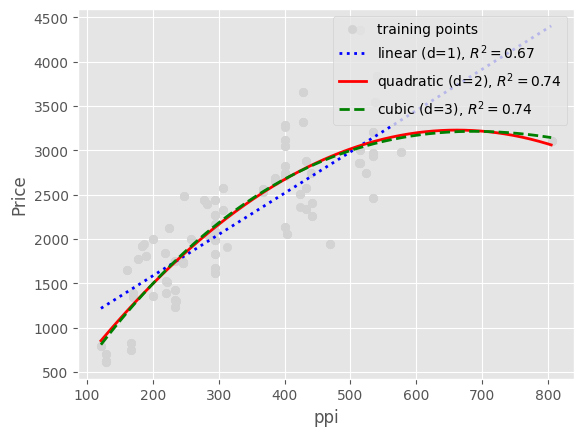

In [ ]:
X = df[['ppi']].values
y = df['Price'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
four = PolynomialFeatures(degree=4)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)
X_four = four.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))

regr = regr.fit(X_four, y)
y_four_fit = regr.predict(four.fit_transform(X_fit))
four_r2 = r2_score(y, regr.predict(X_four))

# plot results
plt.scatter(X, y, label='training points', color='lightgray')

plt.plot(X_fit, y_lin_fit,
         label='linear (d=1), $R^2={:.2f}$'.format(linear_r2),
         color='blue',
         lw=2,
         linestyle=':')

plt.plot(X_fit, y_quad_fit,
         label='quadratic (d=2), $R^2={:.2f}$'.format(quadratic_r2),
         color='red',
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit,
         label='cubic (d=3), $R^2={:.2f}$'.format(cubic_r2),
         color='green',
         lw=2,
         linestyle='--')



plt.xlabel('ppi')
plt.ylabel('Price')
plt.legend(loc='upper right')

Дальше непонятно и опасно

In [ ]:
lr_model_ols = sm.OLS(y_train, X_train).fit()
lr_model_ols.summary()
lr_model_ols.params

Sale           -0.006076
weight         -0.376163
resoloution     0.600371
ppi             0.310477
cpu core        0.131172
cpu freq        0.010096
internal mem    0.079566
ram             0.124432
RearCam        -0.047189
Front_Cam       0.017229
battery         0.168156
dtype: float64

In [ ]:
X = df_norm[['Sale',	'weight',	'resoloution',	'ppi',	'cpu core',	'cpu freq',	'internal mem',	'ram',	'RearCam',	'Front_Cam',	'battery']]
y = df_norm['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

nf = 1 -> ['ram']
nf = 2 -> ['resoloution', 'ram']
nf = 3 -> ['weight', 'resoloution', 'ram']
nf = 4 -> ['weight', 'resoloution', 'ram', 'battery']
nf = 5 -> ['weight', 'resoloution', 'ppi', 'ram', 'battery']
nf = 6 -> ['weight', 'resoloution', 'ppi', 'cpu core', 'ram', 'battery']
nf = 7 -> ['weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'ram', 'battery']
nf = 8 -> ['weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'battery']
nf = 9 -> ['weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'Front_Cam', 'battery']
nf = 10 -> ['Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'Front_Cam', 'battery']
nf = 11 -> ['Sale', 'weight', 'resoloution', 'ppi', 'cpu core', 'cpu freq', 'internal mem', 'ram', 'RearCam', 'Front_Cam', 'battery']


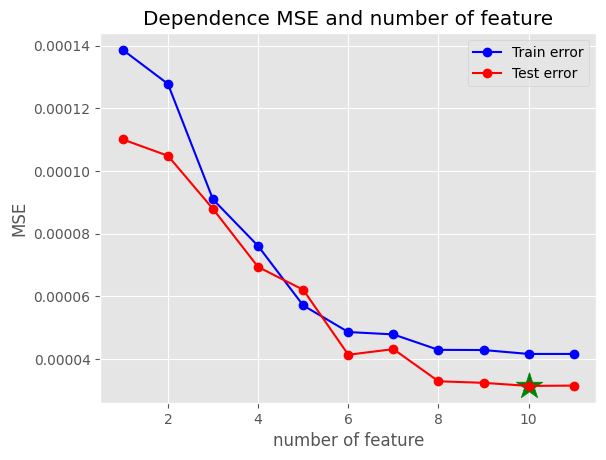

In [ ]:
from sklearn.svm import SVR
nf_array = range(1, len(X.columns) + 1)
lr_model = sm.OLS(y_train, X_train)
mse_trains = []
mse_tests = []
best_features = []
for nf in nf_array:
    estimator = LinearRegression()
    selector = RFE(estimator, n_features_to_select=nf)
    selector.fit(X_train, y_train)

    best_feature = list(X_train.columns[selector.support_])
    best_features.append(best_feature)
    print(f'nf = {nf} -> {best_feature}')

    X_train_new = X_train[best_feature]
    X_test_new = X_test[best_feature]

    estimator.fit(X_train_new, y_train)

    mse_trains.append(mean_squared_error(y_train, estimator.predict(X_train_new)))
    mse_tests.append(mean_squared_error(y_test, estimator.predict(X_test_new)))

fig, ax = plt.subplots()

ax.plot(nf_array, mse_trains, 'o-b', label = 'Train error')
ax.plot(nf_array, mse_tests, 'o-r', label = 'Test error')
ax.set(xlabel='number of feature',ylabel='MSE')
ax.legend()

best_point = min(mse_tests)
m = mse_tests.index(best_point) + 1
ax.scatter(m, best_point,s=400, c='g', marker='*')
ax.set_title('Dependence MSE and number of feature')

plt.show()

In [ ]:
X = df[['Sale',	'weight',	'resoloution',	'ppi',	'cpu core',	'cpu freq',	'internal mem',	'ram',	'RearCam',	'Front_Cam',	'battery']]
y = df['Price']

In [ ]:
from sklearn. model_selection import RepeatedKFold
from numpy import arange
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits= 12 , n_repeats= 10 , random_state= 42)

#define model
model = LassoCV(alphas= arange(0, 1, 0.01), cv=cv, n_jobs=-1)

#fit model
model.fit(X, y)

#display lambda that produced the lowest test MSE
print('Лямбда',model.alpha_ )

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2448242.5391928554, tolerance: 8504.1596
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not con

Лямбда 0.35000000000000003


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2514547.358871639, tolerance: 8589.636331756756
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2316633.420712754, tolerance: 8189.74431891892
  model = cd_fast.enet_coordinate_descent_gram(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning: Objec

In [ ]:
from sklearn. model_selection import RepeatedKFold
from numpy import arange
#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits= 10 , n_repeats= 3 , random_state= 42)

#define model
model = RidgeCV(alphas= arange(0.01, 1, 0.01), cv=cv)

#fit model
model.fit(X, y)

#display lambda that produced the lowest test MSE
print('Лямбда',model.alpha_ )

Лямбда 0.99
